## Imports

In [4]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library
import librosa, librosa.display

In [ ]:
file = "90BPM.wav"
signal, sample_rate = librosa.load(file)

In [ ]:
print(signal)
print(sample_rate)

In [ ]:
FIG_SIZE = (16,8)
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [5]:
#Load the metadata
import csv

with open("musicnet_metadata.csv") as file_name:
    file_read = csv.reader(file_name)
    metadata = list(file_read)

#Cut out everything that's not solo piano
i =0
while i< len(metadata):
    if metadata[i][4] != "Solo Piano":
        metadata.pop(i)
    else:
        i +=1

metadata[1][0]

'1734'

In [16]:
import os
# Load wav files, compute their CQT spectrum, and save it with the same name to the same location as a binary file
# Following this: http://cs229.stanford.edu/proj2017/final-reports/5242716.pdf
bins_per_note =1
octaves = 6
C = []
for i in range(2,20):
    path = "train_data/" + metadata[i][0] 
    if os.path.isfile(path+".wav") and not os.path.isfile(path+".npy"):
        y, sr = librosa.load(path+".wav")
        data = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins= 12*bins_per_note*octaves, bins_per_octave = 12*bins_per_note))
        np.save(path,data)
        print("Finished song ", metadata[i][0])


Finished song  1760
Finished song  1763
Finished song  1764
Finished song  1765
Finished song  1766
Finished song  1768
Finished song  1771
Finished song  1772


In [36]:
#Load 1 set of data
#Load the data from a file saved in the above cell
X = np.load("train_data/"+metadata[0][0]+".npy")
# TODO: this could be better done with pandas maybe?
Y = np.loadtxt("train_labels/"+metadata[0][0]+".csv",delimiter=",",usecols=[0,1,3],skiprows=1)

array([[9.0078000e+04, 9.2638000e+04, 4.2000000e+01],
       [9.0078000e+04, 2.2627000e+05, 6.9000000e+01],
       [1.4998200e+05, 1.8531000e+05, 6.1000000e+01],
       ...,
       [2.3700446e+07, 2.3968733e+07, 5.4000000e+01],
       [2.3700446e+07, 2.3968733e+07, 4.2000000e+01],
       [2.3700446e+07, 2.3968733e+07, 3.0000000e+01]])

In [20]:
i

19

In [8]:
import sys
#Size of the CQT spectrum of the solo piano piece
size = sys.getsizeof(C)/(1024**2)
print(size)
print(size*len(metadata))


5.340576171875e-05
0.008331298828125


ValueError: zero-size array to reduction operation maximum which has no identity

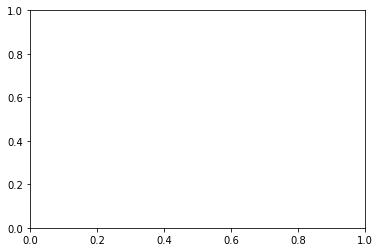

In [9]:
#Plot the spectrum 
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")